## Connecticut Real Estate Analysis 2001-2020

### Importing Necessary Libraries:

In [1]:
# Importing necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset:

In [2]:
#Loading the dataset:
file_path = r"C:\Users\sagni\Desktop\DA\Projects\Python\Real Estate Sales In Connecticut\Real_Estate_Sales_2001-2020_GL.csv"
df = pd.read_csv(file_path)

C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\2591531972.py:3: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Overview of the DataFrame:

In [3]:
#Getting an overview of the DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64


In [5]:
#Looking at the first few rows of the data set:
df.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family,NaN,NaN,NaN,NaN
5,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family,NaN,NaN,NaN,POINT (-72.89675 41.79445)
6,20058,2020,06/01/2021,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family,NaN,"2003 COLONIAL, 2140 SFLA, 2.99 AC",NaN,NaN
7,200046,2020,01/25/2021,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family,NaN,NaN,NaN,NaN
8,200016,2020,11/13/2020,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo,NaN,NaN,NaN,NaN
9,2020360,2020,08/10/2021,Berlin,94 PERCIVAL AVE,140600.0,190790.0,0.736900,Residential,Single Family,NaN,NaN,NaN,NaN


### Cleaning the DataFrame:

In [6]:
# Drop specified columns
columns_to_drop = ['Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the modified DataFrame
df.head(10)


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family
5,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family
6,20058,2020,06/01/2021,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family
7,200046,2020,01/25/2021,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family
8,200016,2020,11/13/2020,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo
9,2020360,2020,08/10/2021,Berlin,94 PERCIVAL AVE,140600.0,190790.0,0.736900,Residential,Single Family


In [7]:
# Display rows with missing values in the 'Date Recorded' column
missing_date_rows = df[df['Date Recorded'].isnull()]
print(missing_date_rows)


        Serial Number  List Year Date Recorded    Town Address  \
177987          20280       2002           NaN  Orange     NaN   
179479              0       2002           NaN  Orange     NaN   

        Assessed Value  Sale Amount  Sales Ratio Property Type  \
177987             0.0          0.0          0.0           NaN   
179479             0.0          0.0          0.0           NaN   

       Residential Type  
177987              NaN  
179479              NaN  


In [8]:
# Drop rows with missing values in the 'Date Recorded' column
df = df.dropna(subset=['Date Recorded'])

##### Converting the Datatypes of some columns

In [9]:
# Convert 'Date Recorded' to datetime
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

# Convert 'Town', 'Address', 'Property Type', and 'Residential Type' to category or string
df['Town'] = df['Town'].astype('category')
df['Address'] = df['Address'].astype('string')
df['Property Type'] = df['Property Type'].astype('category')
df['Residential Type'] = df['Residential Type'].astype('category')

# Display the updated data types
print(df.dtypes)


Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                      category
Address             string[python]
Assessed Value             float64
Sale Amount                float64
Sales Ratio                float64
Property Type             category
Residential Type          category
dtype: object


In [10]:
# Extract year and month from 'Date Recorded'
df['Recorded Year'] = df['Date Recorded'].dt.year
df['Recorded Month'] = df['Date Recorded'].dt.strftime('%b')  
# %b gives the abbreviated month name


In [11]:
df.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Recorded Year,Recorded Month
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family,2021,Apr
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family,2021,May
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,2021,Sep
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family,2020,Dec
4,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family,2021,Sep
5,200121,2020,2020-12-15,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family,2020,Dec
6,20058,2020,2021-06-01,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family,2021,Jun
7,200046,2020,2021-01-25,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family,2021,Jan
8,200016,2020,2020-11-13,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo,2020,Nov
9,2020360,2020,2021-08-10,Berlin,94 PERCIVAL AVE,140600.0,190790.0,0.736900,Residential,Single Family,2021,Aug


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997211 entries, 0 to 997212
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     997211 non-null  int64         
 1   List Year         997211 non-null  int64         
 2   Date Recorded     997211 non-null  datetime64[ns]
 3   Town              997211 non-null  category      
 4   Address           997162 non-null  string        
 5   Assessed Value    997211 non-null  float64       
 6   Sale Amount       997211 non-null  float64       
 7   Sales Ratio       997211 non-null  float64       
 8   Property Type     614767 non-null  category      
 9   Residential Type  608904 non-null  category      
 10  Recorded Year     997211 non-null  int32         
 11  Recorded Month    997211 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(3), int32(1), int64(2), object(1), string(1)
memory usage: 76.1+ MB


### EDA and Research Questions:

C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


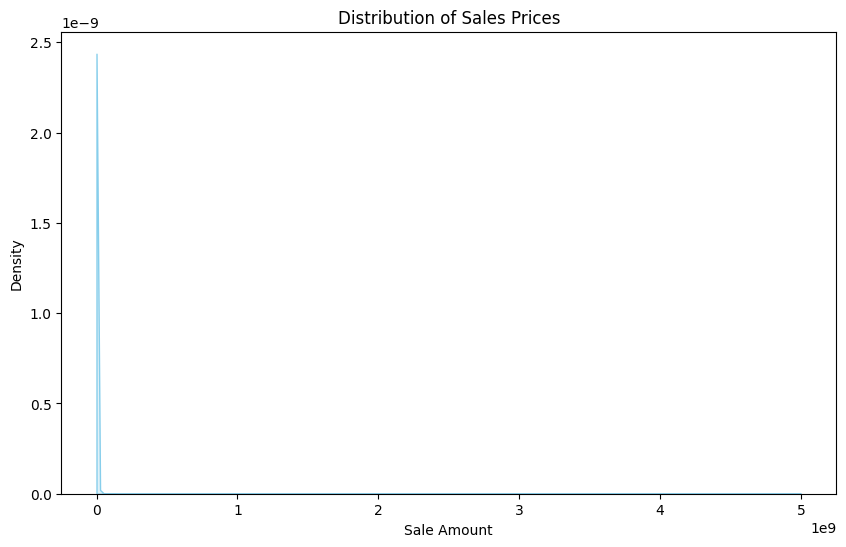

In [13]:
# Research Question 1: What is the distribution of sales prices?
# Visualization 1: Distribution of sales prices (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Sale Amount'], fill=True, color='skyblue')
plt.title('Distribution of Sales Prices')
plt.xlabel('Sale Amount')
plt.ylabel('Density')
plt.show()


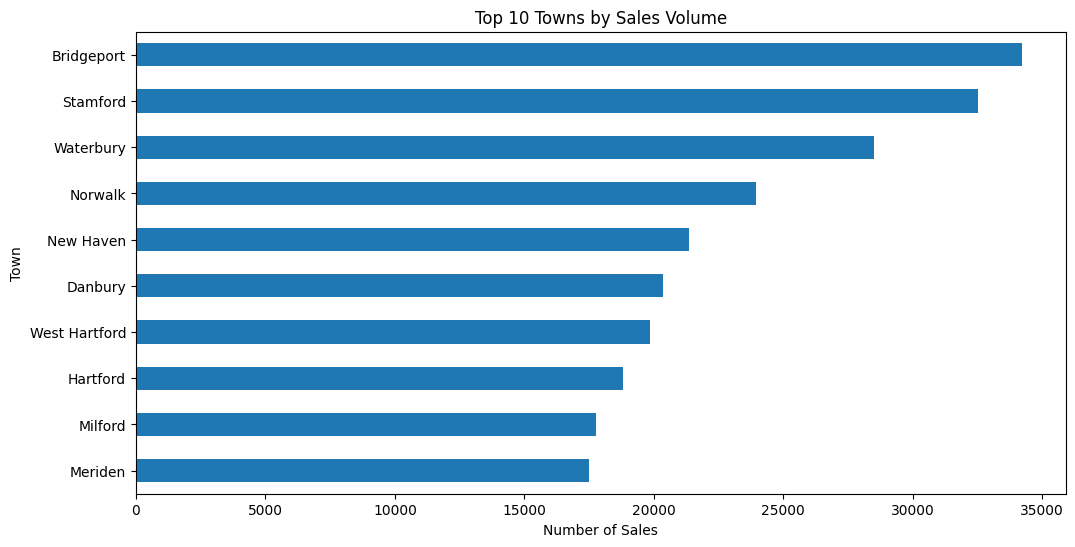

In [14]:
### Research Question 2: Which towns have the highest sales volume?
# Visualization 2: Towns with the highest sales volume (ordered)
top_towns = df['Town'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_towns = top_towns.iloc[::-1]  # Reverse the order
top_towns.plot(kind='barh')
plt.title('Top 10 Towns by Sales Volume')
plt.xlabel('Number of Sales')
plt.ylabel('Town')
plt.show()


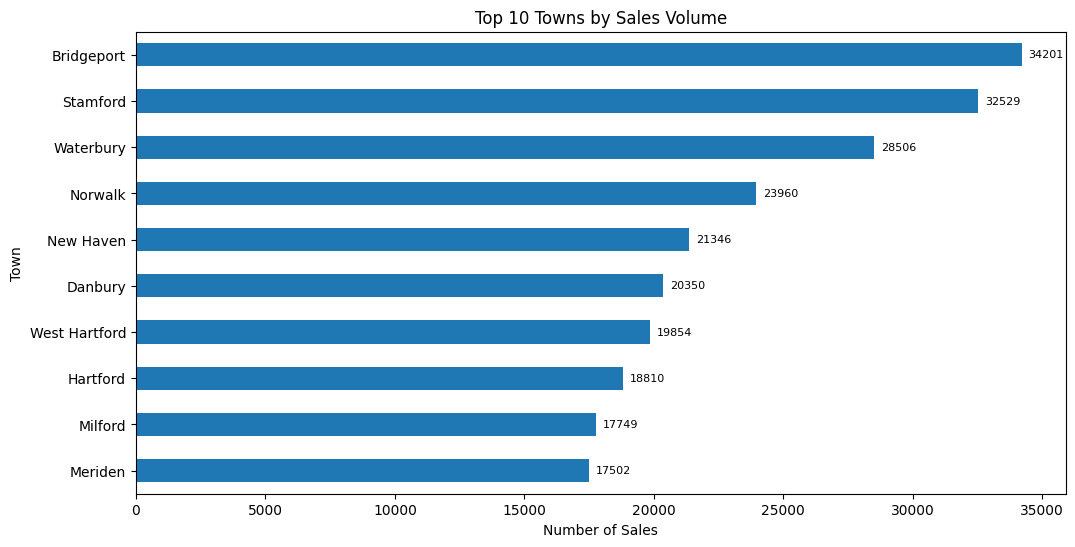

In [15]:
# Research Question 2: Which towns have the highest sales volume?
# Visualization 2: Towns with the highest sales volume (ordered) and with data labels
top_towns = df['Town'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_towns = top_towns.iloc[::-1]  # Reverse the order

# Creating the bar plot
ax = top_towns.plot(kind='barh')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=8, color='black')

plt.title('Top 10 Towns by Sales Volume')
plt.xlabel('Number of Sales')
plt.ylabel('Town')
plt.show()


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


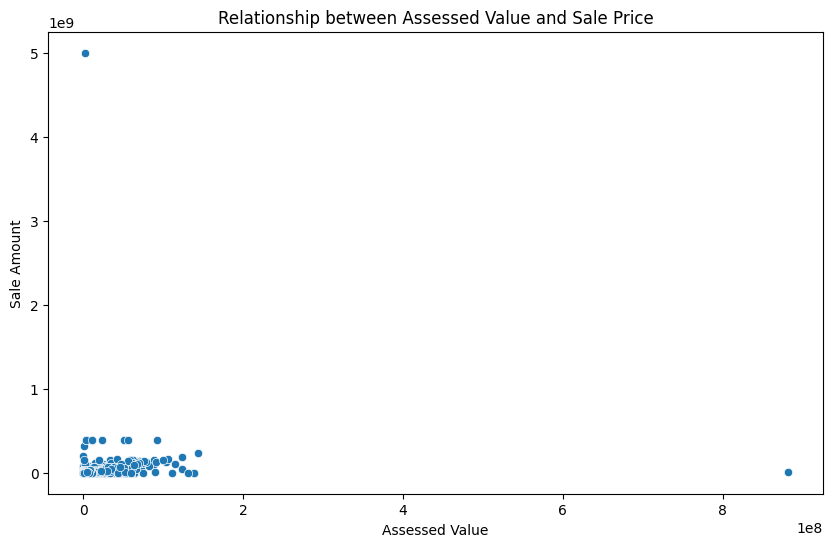

In [16]:
### Research Question 3: What is the relationship between assessed value and sale price?
# Visualization 3: Scatter plot of assessed value vs. sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Assessed Value', y='Sale Amount', data=df)
plt.title('Relationship between Assessed Value and Sale Price')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.show()


In [27]:
# Investigating Outlier 1
outlier_point1 = df[(df['Sale Amount'] > 4e9) & (df['Assessed Value'] < 2e8)]
print(outlier_point1)


       Serial Number  List Year Date Recorded        Town           Address  \
59764       20200091       2020    2021-08-19  Willington  456 TOLLAND TPKE   

       Assessed Value   Sale Amount  Sales Ratio Property Type  \
59764       2238530.0  5.000000e+09     0.000448    Apartments   

      Residential Type  Recorded Year Recorded Month  Year  
59764              NaN           2021            Aug  2021  


In [28]:
# Investigating Outlier 2
outlier_point1 = df[(df['Sale Amount'] < 1e9) & (df['Assessed Value'] > 8e8)]
print(outlier_point1)

        Serial Number  List Year Date Recorded    Town       Address  \
846904         170909       2017    2018-08-15  Hamden  42 WARNER ST   

        Assessed Value  Sale Amount  Sales Ratio Property Type  \
846904     881510000.0    4680000.0     188.3568         Condo   

       Residential Type  Recorded Year Recorded Month  Year  
846904            Condo           2018            Aug  2018  


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


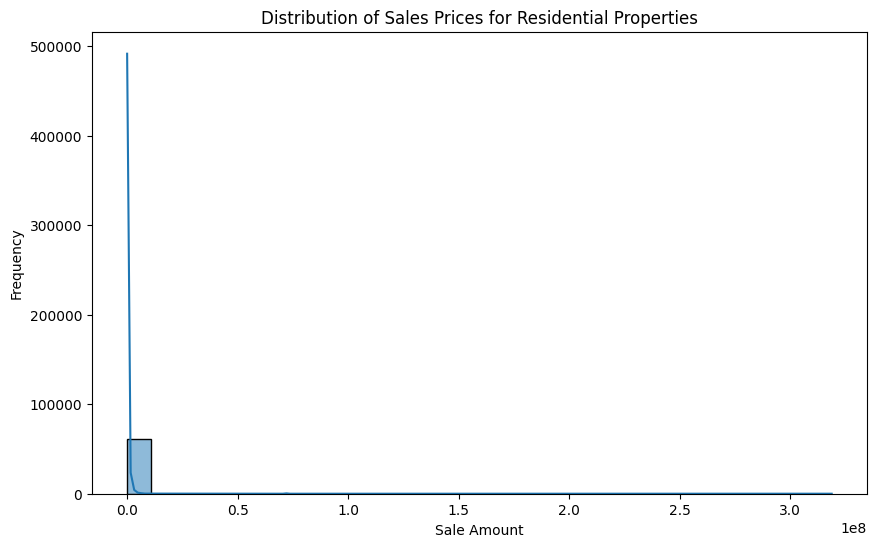

In [19]:
### Research Question 4: What is the distribution of sales prices for residential properties?
# Filter data for residential properties
residential_df = df[df['Property Type'] == 'Residential']

# Visualization 4: Distribution of sales prices for residential properties
plt.figure(figsize=(10, 6))
sns.histplot(residential_df['Sale Amount'], bins=30, kde=True)
plt.title('Distribution of Sales Prices for Residential Properties')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


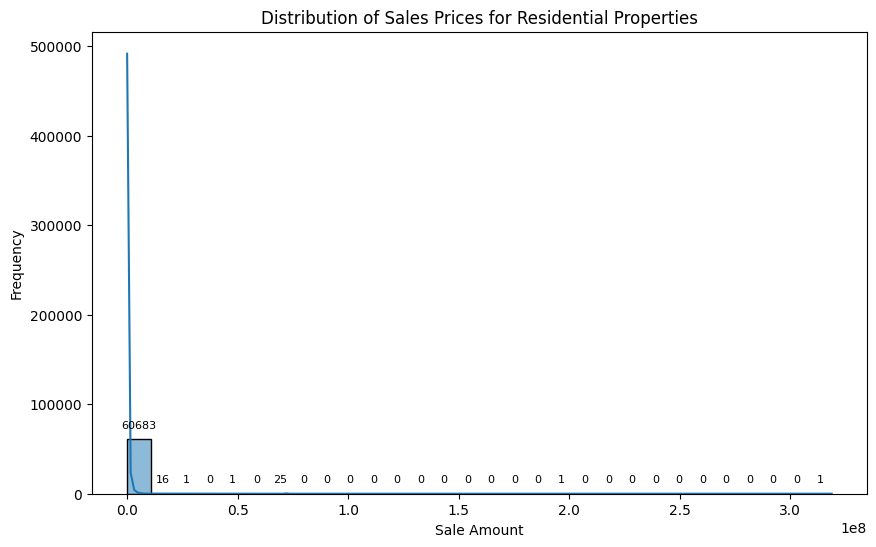

In [20]:
# Research Question 4: What is the distribution of sales prices for residential properties?
# Visualization 4: Distribution of sales prices for residential properties with data labels
plt.figure(figsize=(10, 6))
ax = sns.histplot(residential_df['Sale Amount'], bins=30, kde=True)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Distribution of Sales Prices for Residential Properties')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

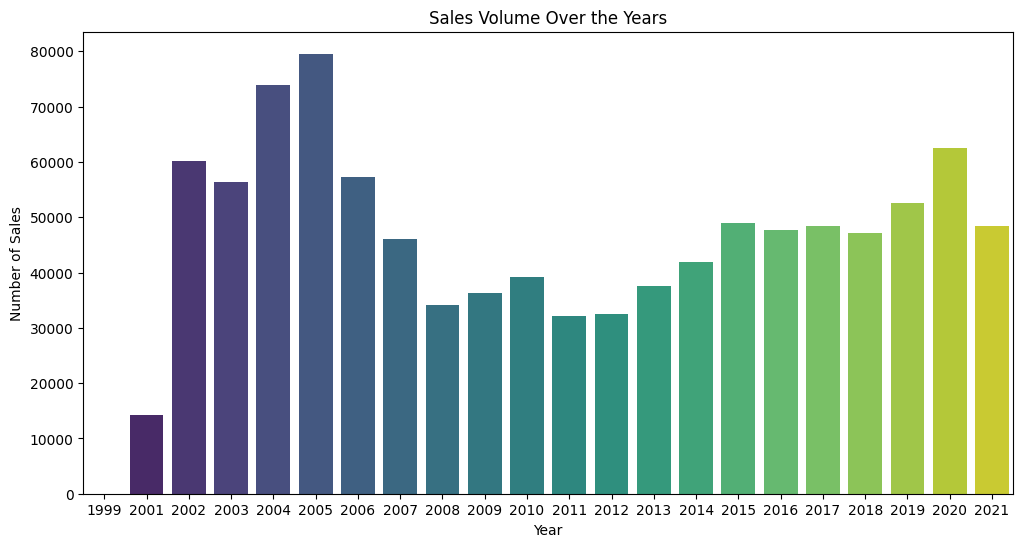

In [21]:
### Research Question 5: How has the overall sales volume changed over the years?
# Visualization 5: Sales volume over the years (Countplot)
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')
df['Year'] = df['Date Recorded'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Sales Volume Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

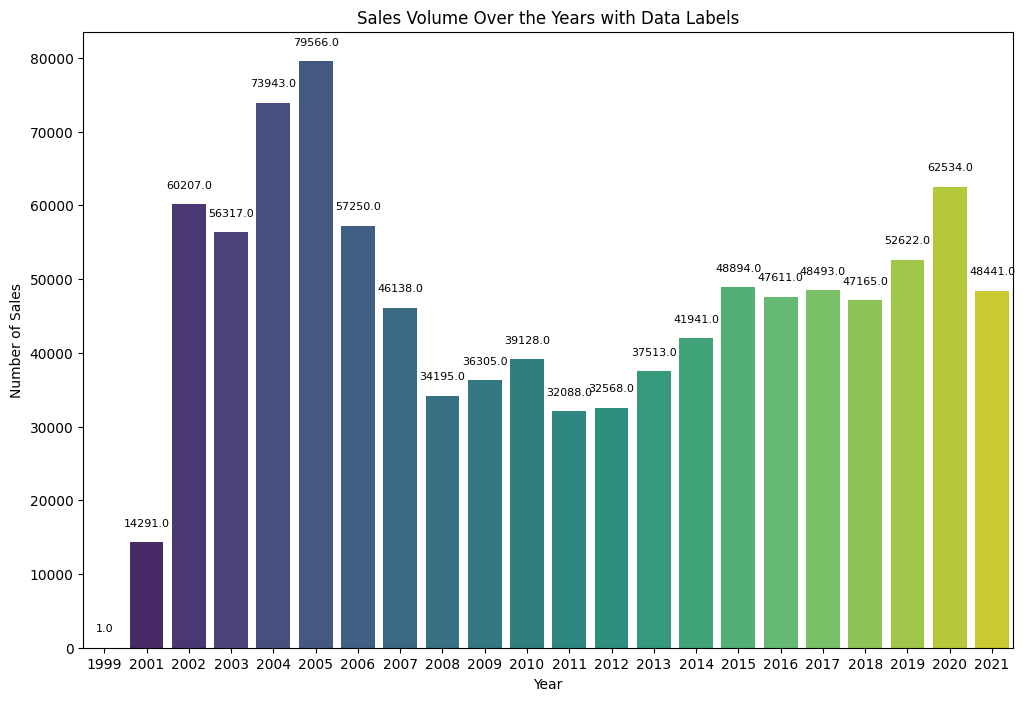

In [22]:
# Research Question 5: How has the overall sales volume changed over the years?
# Visualization 5: Sales volume over the years (Countplot) with data labels
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')
df['Year'] = df['Date Recorded'].dt.year
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Year', data=df, palette='viridis')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Sales Volume Over the Years with Data Labels')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


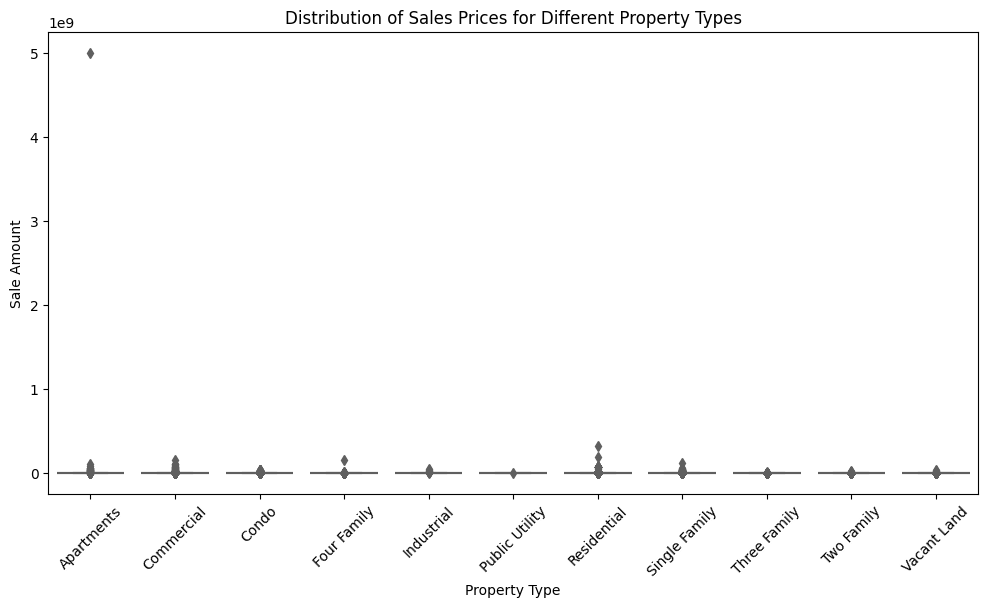

In [23]:
### Research Question 6: What is the distribution of sales prices for different property types?
# Visualization 6: Box plot of sales prices for different property types
plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='Sale Amount', data=df, palette='Set3')
plt.title('Distribution of Sales Prices for Different Property Types')
plt.xlabel('Property Type')
plt.ylabel('Sale Amount')
plt.xticks(rotation=45)
plt.show()


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\1387781093.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to

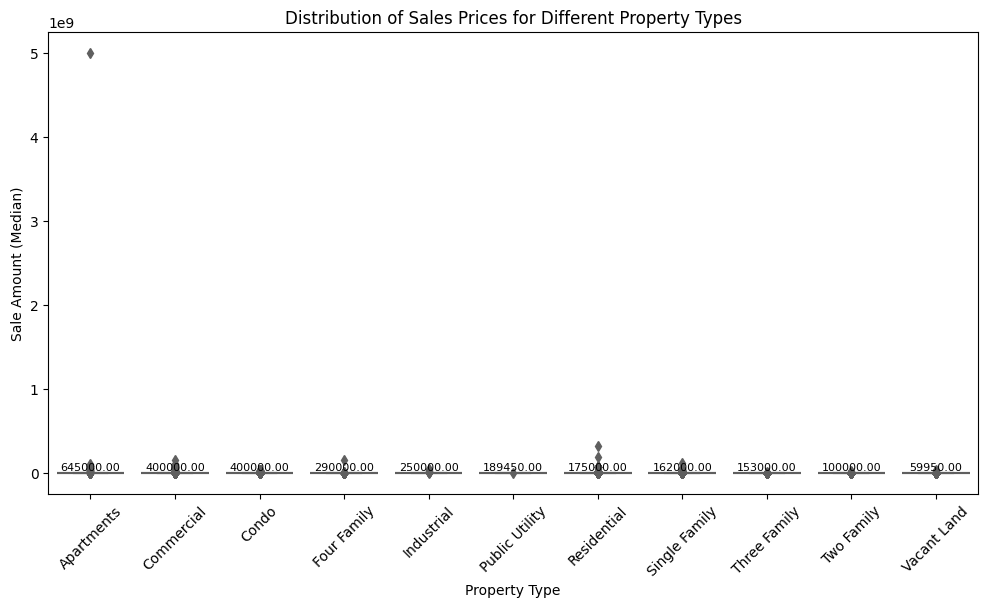

In [29]:
# Research Question 6: What is the distribution of sales prices for different property types?
# Visualization 6: Box plot of sales prices for different property types with median

plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='Sale Amount', data=df, palette='Set3')

# Calculate and annotate median for each property type
medians = df.groupby('Property Type')['Sale Amount'].median().sort_values(ascending=False)
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', ha='center', va='bottom', fontsize=8, color='black')

plt.title('Distribution of Sales Prices for Different Property Types')
plt.xlabel('Property Type')
plt.ylabel('Sale Amount (Median)')
plt.xticks(rotation=45)
plt.show()


C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\2186281184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Sales Ratio', data=df, ci=None, marker='o', color='orange')
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftw

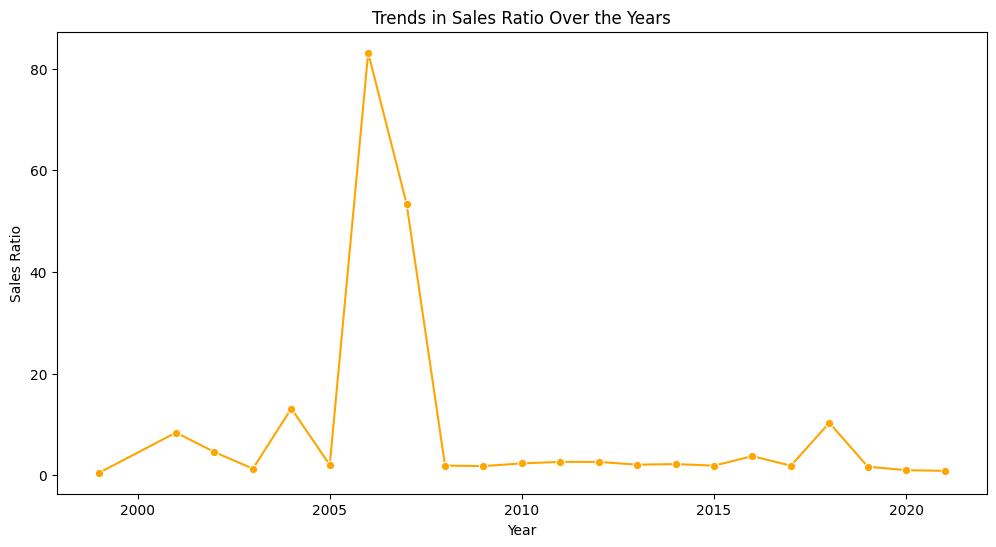

In [25]:
### Research Question 7: Are there any trends in the sales ratio over the years?
# Visualization 7: Trends in sales ratio over the years (Line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sales Ratio', data=df, ci=None, marker='o', color='orange')
plt.title('Trends in Sales Ratio Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales Ratio')
plt.show()


C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\4026349065.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_towns_residential_avg = residential_df.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False).head(10)
C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\4026349065.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Town', y='Sale Amount', data=top_towns_residential_data, order=top_towns_residential_avg.index, palette='muted', ci=None)
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

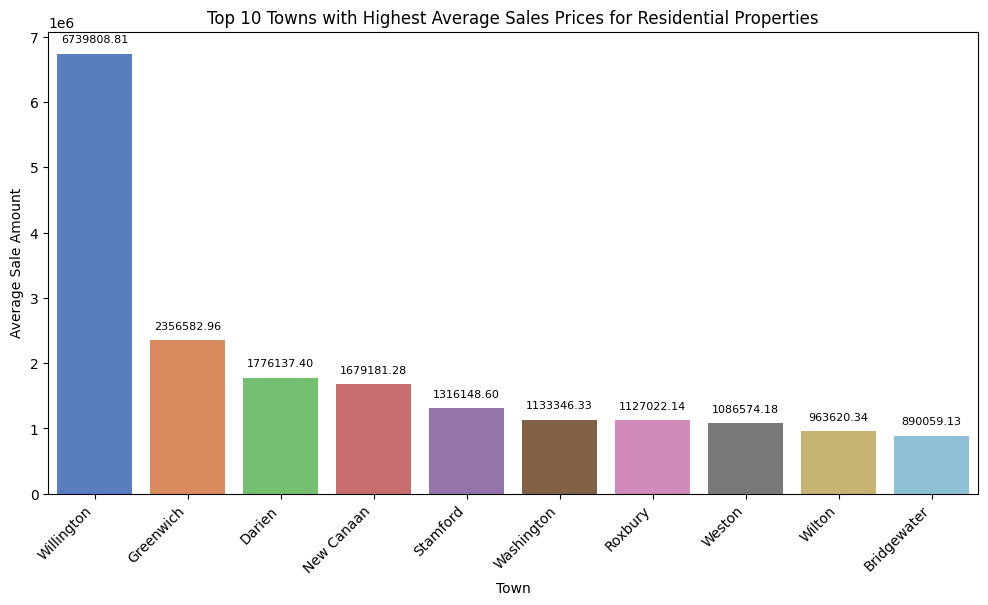

In [33]:
### Research Question 7:  Which are the towns with the highest average sales prices for residential properties?
# Visualization 7: Towns with the highest average sales prices for residential properties
top_towns_residential_avg = residential_df.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False).head(10)
top_towns_residential_data = residential_df[residential_df['Town'].isin(top_towns_residential_avg.index)]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Town', y='Sale Amount', data=top_towns_residential_data, order=top_towns_residential_avg.index, palette='muted', ci=None)

# Adding data labels with average sale amounts
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Top 10 Towns with Highest Average Sales Prices for Residential Properties')
plt.xlabel('Town')
plt.ylabel('Average Sale Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\1907656037.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bottom_towns_residential_avg = residential_df.groupby('Town')['Sale Amount'].mean().sort_values().head(10)
C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\1907656037.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Town', y='Sale Amount', data=bottom_towns_residential_data, order=bottom_towns_residential_avg.index, palette='muted', ci=None)
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

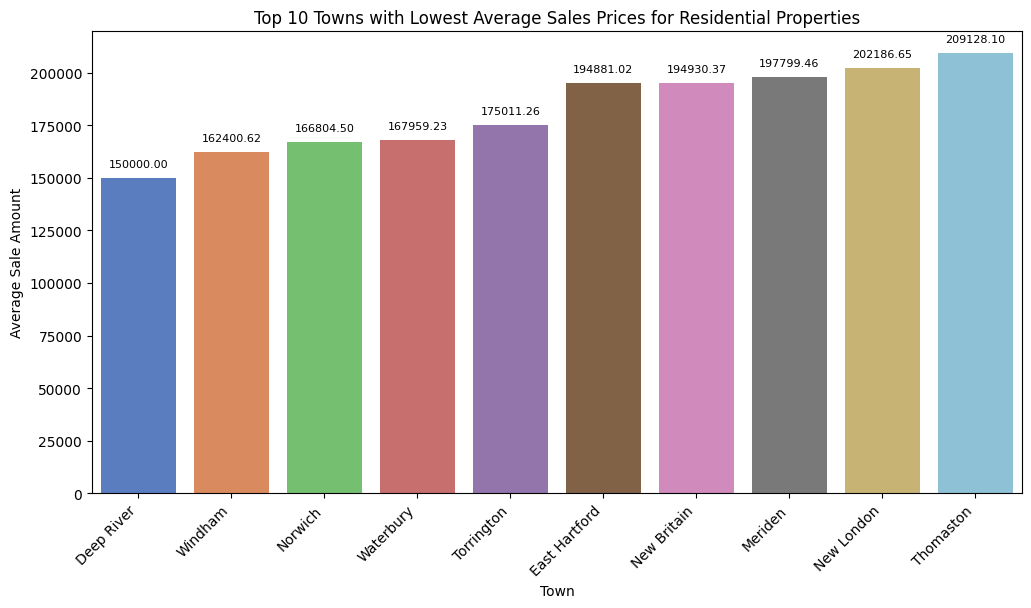

In [36]:
### Research Question 8:  Which are the towns with the lowest average sales prices for residential properties?
# Visualization 8: Towns with the lowest average sales prices for residential properties
bottom_towns_residential_avg = residential_df.groupby('Town')['Sale Amount'].mean().sort_values().head(10)
bottom_towns_residential_data = residential_df[residential_df['Town'].isin(bottom_towns_residential_avg.index)]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Town', y='Sale Amount', data=bottom_towns_residential_data, order=bottom_towns_residential_avg.index, palette='muted', ci=None)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Top 10 Towns with Lowest Average Sales Prices for Residential Properties')
plt.xlabel('Town')
plt.ylabel('Average Sale Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

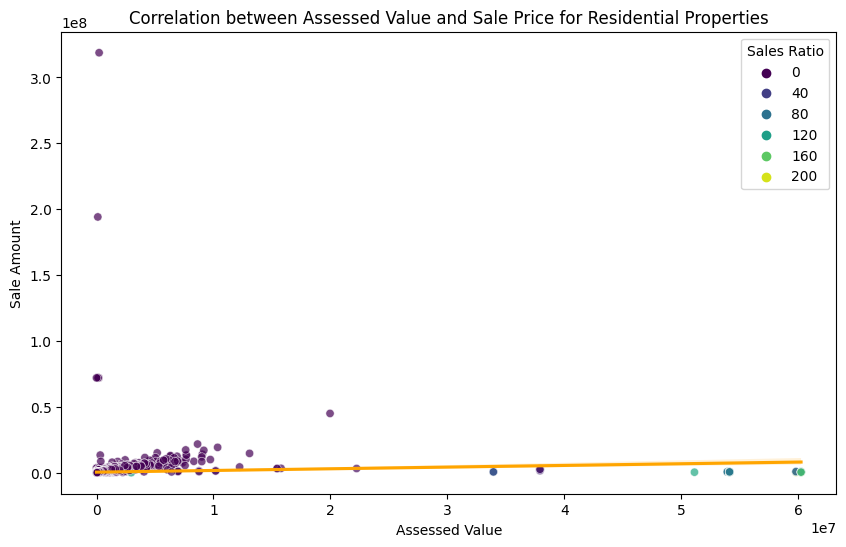

In [37]:
### Research Question 9: Is there a correlation between assessed value and sales price?
# Visualization 9: Scatter plot with color gradient and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Assessed Value', y='Sale Amount', data=residential_df, hue='Sales Ratio', palette='viridis', alpha=0.7)
sns.regplot(x='Assessed Value', y='Sale Amount', data=residential_df, scatter=False, color='orange')
plt.title('Correlation between Assessed Value and Sale Price for Residential Properties')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.legend(title='Sales Ratio')
plt.show()

C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\2049570762.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = sns.barplot(x='Property Type', y='Sale Amount', data=df, ci=None, palette='viridis', order=df.groupby('Property Type')['Sale Amount'].mean().sort_values(ascending=False).index)
C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\2049570762.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Property Type', y='Sale Amount', data=df, ci=None, palette='viridis', order=df.groupby('Property Type')['Sale Amount'].mean().sort_values(ascending=False).index)
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: Future

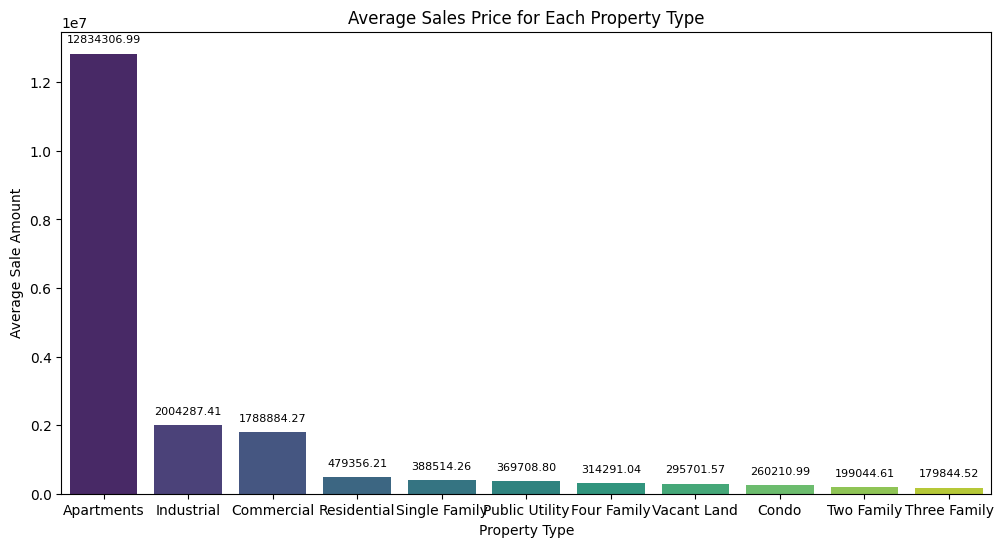

In [60]:
### Research Question 10: What is the average sales price for each property type?
# Visualization 10: Average Sales Price for Each Property Type (Descending Order)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Property Type', y='Sale Amount', data=df, ci=None, palette='viridis', order=df.groupby('Property Type')['Sale Amount'].mean().sort_values(ascending=False).index)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Average Sales Price for Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Sale Amount')
plt.show()

C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\3674343808.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to

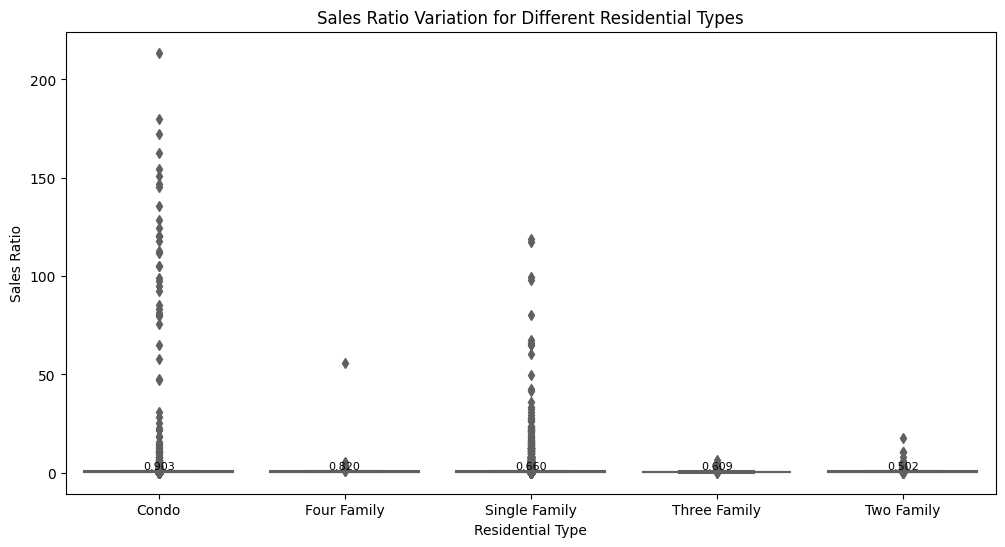

In [49]:
### Research Question 11: How does the sales ratio vary for different residential types?
# Visualization 11: Sales Ratio Variation for Different Residential Types with means and Data Labels
plt.figure(figsize=(12, 6))
sns.boxplot(x='Residential Type', y='Sales Ratio', data=residential_df, palette='coolwarm')

# Adding data labels for average (mean)
averages = residential_df.groupby('Residential Type')['Sales Ratio'].mean().sort_values(ascending=False)
for i, avg in enumerate(averages):
    plt.text(i, avg, f'{avg:.3f}', ha='center', va='bottom', fontsize=8, color='black')

plt.title('Sales Ratio Variation for Different Residential Types')
plt.xlabel('Residential Type')
plt.ylabel('Sales Ratio')
plt.show()

C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\2252997714.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Recorded Month', y='Sale Amount', data=df, ci=None, palette='viridis', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


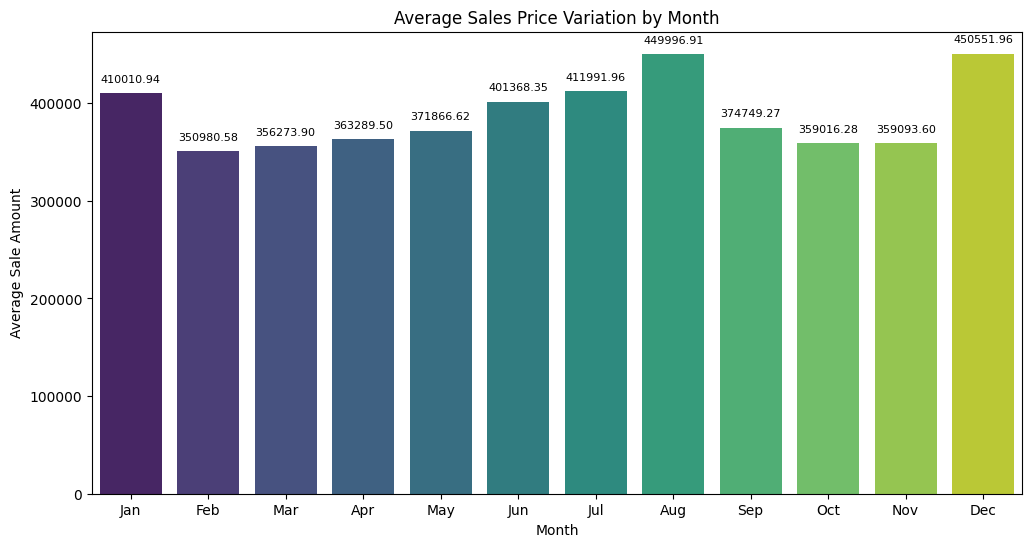

In [50]:
### Research Question 12: How does the average sales price vary for different months of the year?
# Visualization 12: Average Sales Price Variation by Month with Data Labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Recorded Month', y='Sale Amount', data=df, ci=None, palette='viridis', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Average Sales Price Variation by Month')
plt.xlabel('Month')
plt.ylabel('Average Sale Amount')
plt.show()


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


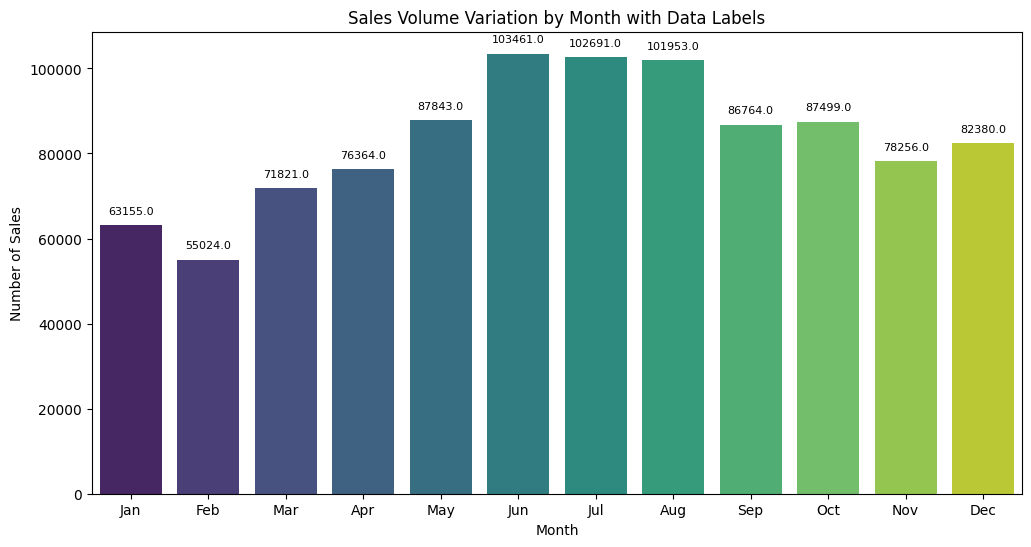

In [51]:
### Research Question 13: How does the sales volume vary for different months of the year?
# Visualization 13: Sales Volume Variation by Month with Data Labels
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Recorded Month', data=df, palette='viridis', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Sales Volume Variation by Month with Data Labels')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


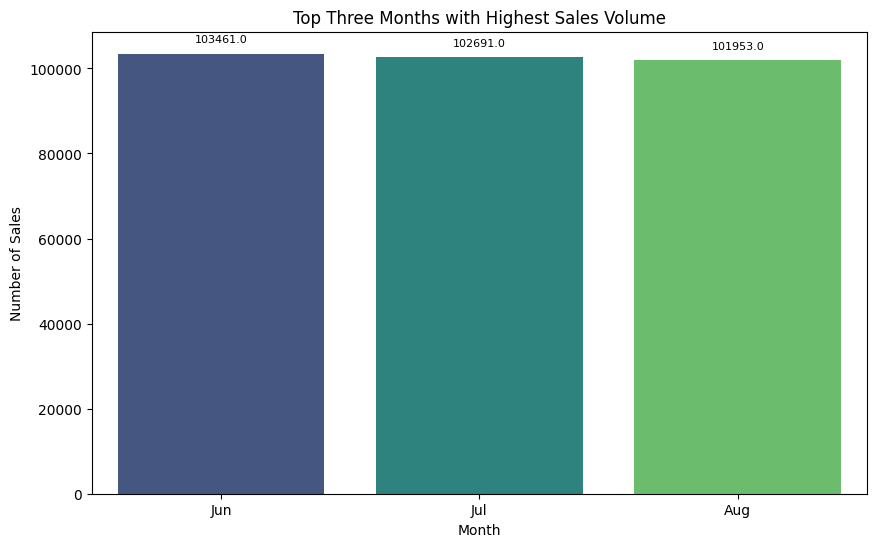

In [57]:
### Research Question 14: What are the top three months with the highest sales volume?
# Visualization 14: Top Three Months with Highest Sales Volume (with Data Labels)
top_months = df['Recorded Month'].value_counts().head(3).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Recorded Month', data=df, palette='viridis', order=top_months)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Top Three Months with Highest Sales Volume')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

C:\Users\sagni\AppData\Local\Temp\ipykernel_6664\2594633795.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Residential Type', y='Sale Amount', data=residential_df, ci=None, palette='coolwarm')
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and 

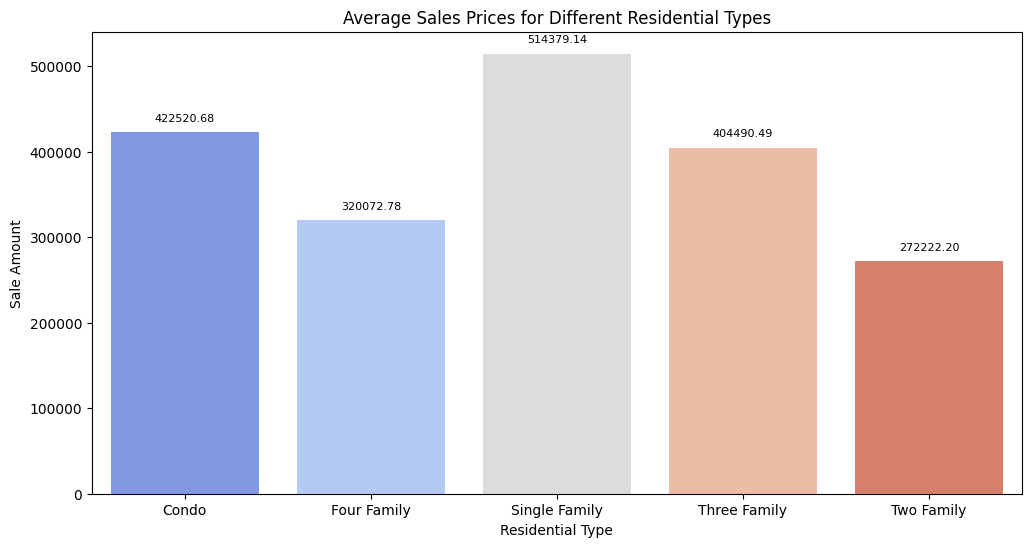

In [55]:
### Research Question 15: How do sales prices vary for different residential types?
# Visualization 15: Average Sales prices for various residential types
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Residential Type', y='Sale Amount', data=residential_df, ci=None, palette='coolwarm')

# Adding data labels with average sale amounts
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Average Sales Prices for Different Residential Types')
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount')
plt.show()


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


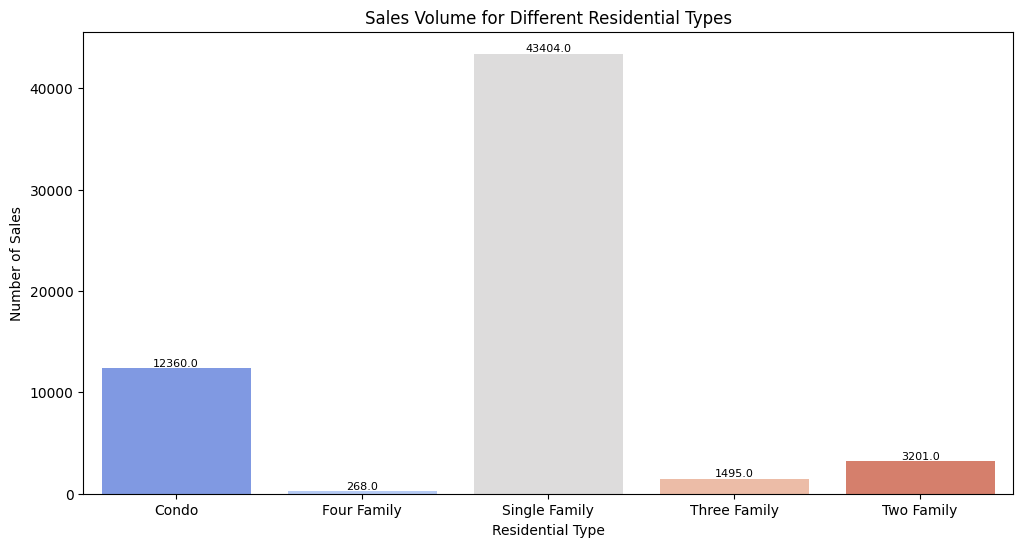

In [59]:
### Research Question 16: How does the sales volume vary for different residential types?
# Visualization 16: Sales Volume for Different Residential Types (with Data Labels)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Residential Type', data=residential_df, palette='coolwarm')

# Adding data labels using ax.text
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom', fontsize=8, color='black')

plt.title('Sales Volume for Different Residential Types')
plt.xlabel('Residential Type')
plt.ylabel('Number of Sales')
plt.show()
